<a href="https://colab.research.google.com/github/Ozi-cyber/Machine-Learning-Project/blob/main/MachineLearningLE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##GOLD PRICE PREDICTION: COMPARISON OF MACROECONOMIC VARIABLES AND TECHNICAL INDICATORS USING REGRESSION ALGORITHMS

Dataset: https://www.kaggle.com/datasets/sid321axn/gold-price-prediction-datase

# Import Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_absolute_percentage_error
from datetime import datetime
from matplotlib import pyplot
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from keras.models import Sequential
from keras.layers import Dense

# Import dataset

In [ ]:
df = pd.read_csv("Gold_Price_Data.csv")
df.index = pd.to_datetime(df['Date'], format='%m/%d/%Y')

In [ ]:
df.describe()

,SPX,USO,SLV,EUR/USD,RSI,ROC,Moving Average,MFI,GLD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,31.842221,20.084997,1.283653,51.265411,0.521383,122.237251,53.037906,122.732875
std,519.111540,19.523517,7.092566,0.131547,12.197325,5.512781,23.831194,93.772507,23.283346
min,676.530029,7.960000,8.850000,1.039047,15.660000,-17.690000,48.490000,0.340000,70.000000
25%,1239.874969,14.380000,15.570000,1.171313,43.197500,-2.260000,108.955000,39.242500,109.725000
50%,1551.434998,33.869999,17.268500,1.303297,50.950000,0.380000,119.890000,51.145000,120.580002
75%,2073.010070,37.827501,22.882500,1.369971,59.945000,3.100000,133.192500,62.955000,132.840004
max,2872.870117,117.480003,47.259998,1.598798,86.010000,121.890000,197.830000,4467.000000,184.589996


In [ ]:
df.shape

(2290, 10)

In [ ]:
for x in ['Moving Average', 'MFI', 'ROC', 'RSI']:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    df.loc[df[x] < min,x] = np.nan
    df.loc[df[x] > max,x] = np.nan

df = df.dropna(axis = 0)

In [ ]:
print(df['Moving Average'].isnull)

<bound method Series.isnull of Date
2008-01-02     79.31
2008-01-03     79.53
2008-01-04     79.73
2008-01-07     79.91
2008-01-08     80.13
               ...  
2018-05-08    125.90
2018-05-09    125.89
2018-05-10    125.89
2018-05-14    125.88
2018-05-16    125.74
Name: Moving Average, Length: 2218, dtype: float64>


# Assign Variables

In [ ]:
macro_X = df.iloc[:, 1:5]
tech_X = df.iloc[:,5:9]
y = df.iloc[:, -1]

# Split dataset

In [ ]:
macro_X_train, macro_X_test, y_train, y_test = train_test_split(macro_X, y, test_size = 0.25, random_state=0, shuffle = False)

# Linear Regression

### Macro

In [ ]:
lr = LinearRegression()

#training the model with the linear regression function
lr.fit(macro_X_train, y_train)

LinearRegression()

In [ ]:
lr_train_macro_predictions = lr.predict(macro_X_train)
lr_test_macro_predictions = lr.predict(macro_X_test)
y_test = pd.DataFrame(y_test)

In [ ]:
result1 = (round(metrics.mean_absolute_error(y_test, lr_test_macro_predictions), 2))
result2 = (round(np.sqrt(metrics.mean_squared_error(y_test, lr_test_macro_predictions)), 2))
result3 = (round(metrics.mean_absolute_percentage_error(y_test, lr_test_macro_predictions), 2))

### Tech

In [ ]:
tech_X_train, tech_X_test, y_tech_train, y_tech_test = train_test_split(tech_X, y, test_size = 0.25, random_state=0, shuffle = False)

In [ ]:
lr.fit(tech_X_train, y_tech_train)

LinearRegression()

In [ ]:
lr_train_tech_predictions = lr.predict(tech_X_train)
lr_test_tech_predictions = lr.predict(tech_X_test)
y_tech_test = pd.DataFrame(y_tech_test)

In [ ]:
result4 = (round(metrics.mean_absolute_error(y_tech_test, lr_test_tech_predictions), 2))
result5 = (round(np.sqrt(metrics.mean_squared_error(y_tech_test, lr_test_tech_predictions)), 2))
result6 = (round(metrics.mean_absolute_percentage_error(y_tech_test, lr_test_tech_predictions), 2))

# Random Forest

### Macro

In [ ]:
rfr = RandomForestRegressor(n_estimators = 1000, random_state = 0)
rfr.fit(macro_X_train, y_train)

RandomForestRegressor(n_estimators=1000, random_state=0)

In [ ]:
rf_train_predict_macro = rfr.predict(macro_X_train)
rf_test_predict_macro = rfr.predict(macro_X_test)
y_test = pd.DataFrame(y_test)

In [ ]:
def mape(y_test, pred):
    y_test, pred = np.array(y_test), np.array(pred)
    mape = np.mean(np.abs((y_test - pred) / y_test))
    return mape

In [ ]:
result7 = (round(mean_absolute_error(y_test, rf_test_predict_macro), 2))
result8 = (round(np.sqrt(mean_squared_error(y_test, rf_test_predict_macro)), 2))
result9 = (round(mape(y_test, rf_test_predict_macro), 2))

### Tech

In [ ]:
rfr.fit(tech_X_train, y_train)

RandomForestRegressor(n_estimators=1000, random_state=0)

In [ ]:
rf_train_predict_tech = rfr.predict(tech_X_train)
rf_test_predict_tech = rfr.predict(tech_X_test)
y_tech_test = pd.DataFrame(y_tech_test)

In [ ]:
result10 = (round(mean_absolute_error(y_tech_test, rf_test_predict_tech), 2))
result11 = (round(np.sqrt(mean_squared_error(y_tech_test, rf_test_predict_tech)), 2))
result12 = (round(mape(y_tech_test, rf_test_predict_tech), 2))

# Gradient Boosting

### Macro

In [ ]:
GBR = GradientBoostingRegressor(n_estimators=2000,learning_rate=.01,subsample=.5,
                                max_depth=9,random_state=1)

In [ ]:
GBR.fit(macro_X_train, y_train)
test_y_pred_macro_gbr = GBR.predict(macro_X_test)
train_y_pred_macro_gbr = GBR.predict(macro_X_train)
y_test = pd.DataFrame(y_test)

In [ ]:
result13 = (round(mean_absolute_error(y_test, test_y_pred_macro_gbr), 2))
result14 = (round(np.sqrt(mean_squared_error(y_test, test_y_pred_macro_gbr)), 2))
result15 = (round(mape(y_test, test_y_pred_macro_gbr), 2))

### Tech

In [ ]:
GBR.fit(tech_X_train, y_train)
test_y_pred_tech_gbr = GBR.predict(tech_X_test)
train_y_pred_tech_gbr = GBR.predict(tech_X_train)
y_tech_test = pd.DataFrame(y_tech_test)

In [ ]:
result16 = (round(mean_absolute_error(y_tech_test, test_y_pred_tech_gbr), 2))
result17 = (round(np.sqrt(mean_squared_error(y_tech_test, test_y_pred_tech_gbr)), 2))
result18 = (round(mape(y_tech_test, test_y_pred_tech_gbr), 2))

# ANN

In [ ]:
TargetVariable=['GLD']
Macro_Predictors=['SPX', 'USO', 'SLV', 'EUR/USD']
tech_Predictors=['RSI', 'ROC', 'Moving Average', 'MFI']

In [ ]:
X_macro=df[Macro_Predictors].values
X_tech=df[tech_Predictors].values
Y=df[TargetVariable].values

## Scaling

In [ ]:
MacroScaler=StandardScaler()
TechScaler=StandardScaler()
TargetVarScaler=StandardScaler()

In [ ]:
MacroScalerFit=MacroScaler.fit(X_macro)
TechScalerFit=TechScaler.fit(X_tech)
TargetVarScalerFit=TargetVarScaler.fit(Y)

In [ ]:
X_macro=MacroScalerFit.transform(X_macro)
X_tech=TechScalerFit.transform(X_tech)
Y=TargetVarScalerFit.transform(Y)

### Macro

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_macro, Y, test_size=0.25, random_state=0, shuffle=False)

In [ ]:
model = Sequential()
model.add(Dense(units=4, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, Y_train ,batch_size = 5, epochs = 10)

Epoch 1/10
333/333 [==============================] - 1s 2ms/step - loss: 0.7094
Epoch 2/10
333/333 [==============================] - 1s 1ms/step - loss: 0.2292
Epoch 3/10
333/333 [==============================] - 1s 1ms/step - loss: 0.1483
Epoch 4/10
333/333 [==============================] - 0s 1ms/step - loss: 0.1123
Epoch 5/10
333/333 [==============================] - 0s 1ms/step - loss: 0.0925
Epoch 6/10
333/333 [==============================] - 1s 2ms/step - loss: 0.0814
Epoch 7/10
333/333 [==============================] - 1s 2ms/step - loss: 0.0756
Epoch 8/10
333/333 [==============================] - 0s 1ms/step - loss: 0.0724
Epoch 9/10
333/333 [==============================] - 1s 2ms/step - loss: 0.0713
Epoch 10/10
333/333 [==============================] - 1s 2ms/step - loss: 0.0704


In [ ]:
predict=model.predict(X_test)

18/18 [==============================] - 0s 1ms/step


In [ ]:
predict=TargetVarScalerFit.inverse_transform(predict)
test_data=TargetVarScalerFit.inverse_transform(Y_test)
Test_Data=MacroScalerFit.inverse_transform(X_test)

TestingData=pd.DataFrame(data=Test_Data, columns=Macro_Predictors)

In [ ]:
result19 = (round(metrics.mean_absolute_error(test_data, predict), 2))
result20 = (round(np.sqrt(metrics.mean_squared_error(test_data, predict)), 2))
result21 = (round(metrics.mean_absolute_percentage_error(test_data, predict), 2))

### Tech

In [ ]:
X_train_tech, X_test_tech, Y_train, Y_test = train_test_split(X_tech, Y, test_size=0.25, random_state=0, shuffle=False)

In [ ]:
tech_model = Sequential()
tech_model.add(Dense(units=4, activation='relu'))
tech_model.add(Dense(1))
tech_model.compile(loss='mean_squared_error', optimizer='adam')
tech_model.fit(X_train_tech, Y_train ,batch_size = 32, epochs = 100)

Epoch 1/100
52/52 [==============================] - 1s 2ms/step - loss: 3.2640
Epoch 2/100
52/52 [==============================] - 0s 2ms/step - loss: 2.3592
Epoch 3/100
52/52 [==============================] - 0s 2ms/step - loss: 1.8125
Epoch 4/100
52/52 [==============================] - 0s 2ms/step - loss: 1.4470
Epoch 5/100
52/52 [==============================] - 0s 2ms/step - loss: 1.1881
Epoch 6/100
52/52 [==============================] - 0s 2ms/step - loss: 0.9961
Epoch 7/100
52/52 [==============================] - 0s 2ms/step - loss: 0.8460
Epoch 8/100
52/52 [==============================] - 0s 2ms/step - loss: 0.7295
Epoch 9/100
52/52 [==============================] - 0s 2ms/step - loss: 0.6342
Epoch 10/100
52/52 [==============================] - 0s 2ms/step - loss: 0.5569
Epoch 11/100
52/52 [==============================] - 0s 3ms/step - loss: 0.4937
Epoch 12/100
52/52 [==============================] - 0s 2ms/step - loss: 0.4401
Epoch 13/100
52/52 [=================

In [ ]:
tech_predict=tech_model.predict(X_test_tech)

18/18 [==============================] - 0s 2ms/step


In [ ]:
tech_predict=TargetVarScalerFit.inverse_transform(tech_predict)
tech_test_data=TargetVarScalerFit.inverse_transform(Y_test)
tech_Test_Data=TechScalerFit.inverse_transform(X_test_tech)

In [ ]:
result22 = (round(metrics.mean_absolute_error(tech_test_data, tech_predict), 2))
result23 = (round(np.sqrt(metrics.mean_squared_error(tech_test_data, tech_predict)), 2))
result24 = (round(metrics.mean_absolute_percentage_error(tech_test_data, tech_predict), 2))

# Metrics

### Macro

In [ ]:
macro_data = {
    "Linear" : [result1, result2, result3],
    "Random Forest" : [result7, result8, result9],
    "Gradient Boosting" : [result13, result14, result15],
    "ANN" : [result19, result20, result21]
}
macro = pd.DataFrame(macro_data, index = ["MAE", "RMSE", "MAPE"])

In [ ]:
macro

,Linear,Random Forest,Gradient Boosting,ANN
MAE,6.47,4.88,4.84,3.52
RMSE,7.95,5.96,5.87,4.04
MAPE,0.06,0.07,0.06,0.03


### Tech

In [ ]:
tech_data = {
    "Linear" : [result4, result5, result6],
    "Random Forest" : [result10, result11, result12],
    "Gradient Boosting" : [result16, result17, result18],
    "ANN" : [result22, result23, result24]
}

tech = pd.DataFrame(tech_data, index = ["MAE", "RMSE", "MAPE"])

In [ ]:
tech

,Linear,Random Forest,Gradient Boosting,ANN
MAE,1.81,2.30,2.33,1.70
RMSE,2.29,2.94,2.97,2.18
MAPE,0.02,0.06,0.06,0.01


#Results and Data Visualizations

### Macro

In [ ]:
y_test = pd.DataFrame(y_test)
GLD_pred = y_test.drop("GLD", axis = 1)
GLD_pred['LR_Pred'] = lr_test_macro_predictions
GLD_pred['RFR_Pred'] = rf_test_predict_macro
GLD_pred['GBR_Pred'] = test_y_pred_macro_gbr
GLD_pred['ANN_Pred'] = predict
GLD_pred

,LR_Pred,RFR_Pred,GBR_Pred,ANN_Pred
Date,,,,
2015-11-10,117.617622,104.657911,104.362524,106.922546
2015-11-11,117.334858,104.935731,105.076553,106.567558
2015-11-12,117.134093,105.041461,105.311746,107.024231
2015-11-13,116.706816,105.379481,105.545102,107.250931
2015-11-16,117.259174,105.049031,105.318359,106.595627
...,...,...,...,...
2018-05-08,123.419153,114.949820,114.793108,127.416435
2018-05-09,123.664796,115.198340,114.756021,127.577095
2018-05-10,124.251214,115.942909,115.914579,129.387314


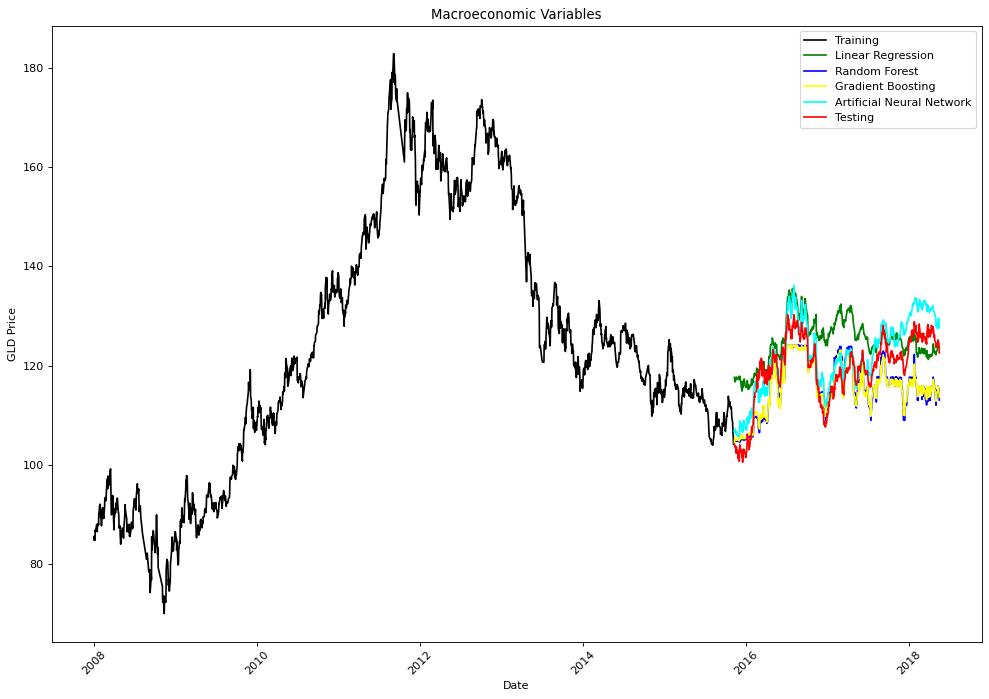

In [ ]:
from matplotlib.pyplot import figure

figure(figsize=(15, 10), dpi=80)
plt.plot(y_train, color = "black", label = "Training")
plt.plot(GLD_pred['LR_Pred'], color='green', label = 'Linear Regression')
plt.plot(GLD_pred['RFR_Pred'], color='blue', label = 'Random Forest')
plt.plot(GLD_pred['GBR_Pred'], color='yellow', label = 'Gradient Boosting')
plt.plot(GLD_pred['ANN_Pred'], color='cyan', label = 'Artificial Neural Network')
plt.plot(y_test, color = "red", label = "Testing")
plt.ylabel('GLD Price')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Macroeconomic Variables")
plt.legend()
plt.show()

### Tech

In [ ]:
y_test = pd.DataFrame(y_test)
tech_GLD_pred = y_test.drop("GLD", axis = 1)
tech_GLD_pred['LR_Pred'] = lr_test_tech_predictions
tech_GLD_pred['RFR_Pred'] = rf_test_predict_tech
tech_GLD_pred['GBR_Pred'] = test_y_pred_tech_gbr
tech_GLD_pred['ANN_Pred'] = tech_predict
tech_GLD_pred

,LR_Pred,RFR_Pred,GBR_Pred,ANN_Pred
Date,,,,
2015-11-10,101.271996,104.499730,104.508961,101.960930
2015-11-11,100.719799,104.446089,104.509991,101.475899
2015-11-12,100.728596,104.466989,104.688028,101.455421
2015-11-13,100.523630,104.439479,104.453212,101.212303
2015-11-16,100.985281,104.467420,104.548527,101.636719
...,...,...,...,...
2018-05-08,124.327183,124.385381,124.503903,123.455391
2018-05-09,123.179299,123.882340,123.927416,122.265656
2018-05-10,125.530029,124.838059,124.909976,124.453735


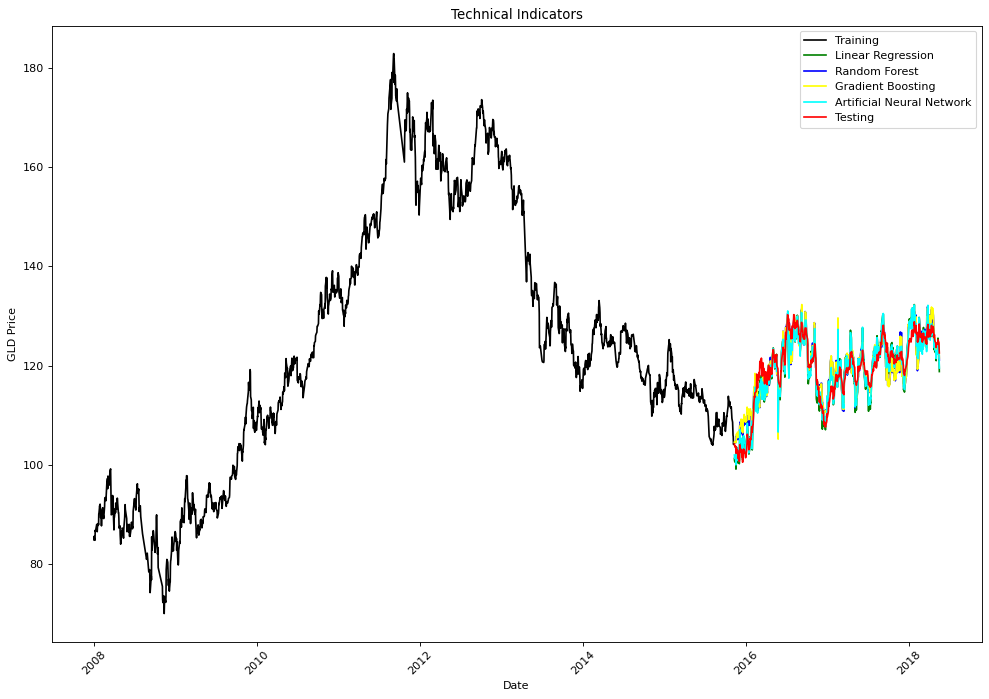

In [ ]:
figure(figsize=(15, 10), dpi=80)
plt.plot(y_train, color = "black", label = "Training")
plt.plot(tech_GLD_pred['LR_Pred'], color='green',  label = 'Linear Regression')
plt.plot(tech_GLD_pred['RFR_Pred'], color='blue', label = 'Random Forest')
plt.plot(tech_GLD_pred['GBR_Pred'], color='yellow', label = 'Gradient Boosting')
plt.plot(tech_GLD_pred['ANN_Pred'], color='cyan', label = 'Artificial Neural Network')
plt.plot(y_test, color = "red", label = "Testing")
plt.ylabel('GLD Price')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Technical Indicators")
plt.legend()
plt.show()